MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1) 

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"] 

In [5]:
X.shape

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

In [6]:
y.shape

(70000,)

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [9]:
some_digit = X[0] 
some_digit_image = some_digit.reshape(28, 28)

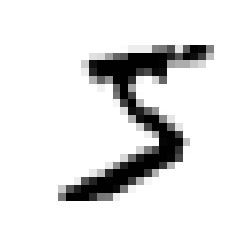

In [10]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest") 
plt.axis("off") 
plt.show()

In [11]:
y[0]

'5'

The output of y[0] is a sring and not number and as most of the algorithms perfer numbers we will convert the Y's values into numbers.

In [12]:
import numpy as np

In [13]:
y = y.astype(np.uint8) 

Spliting the dataset into train & test set

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

# Training a Binary Classifier 

In [15]:
y_train_5 = (y_train == 5) 

In [16]:
y_test_5 = (y_test == 5) 

# Stochastic Gradient Descent (SGD) classifier

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)

In [19]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Performance Measures 

# Measuring Accuracy Using Cross-Validation

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

# Confusion Matrix 

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 

In [24]:
from sklearn.metrics import confusion_matrix 

In [25]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):


In [26]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection

In [27]:
confusion_matrix(y_train_5, y_train_perfect_predictions) 

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score 

In [29]:
 precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

When it claims an image represents a 5, it is correct only 83.7% of the time. Moreover, it only detects 65% of the 5s.

In [31]:
 from sklearn.metrics import f1_score 

In [32]:
f1_score(y_train_5, y_train_pred) 

0.7325171197343846

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall

Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.


In [33]:
y_score = cross_val_predict(sgd_clf,X_train,y_train_5,
                            cv=3,method='decision_function')

In [34]:
y_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
precision,recall,thresholds = precision_recall_curve(y_train_5,y_score)

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid(True)                              
    plt.legend(loc="center left", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)



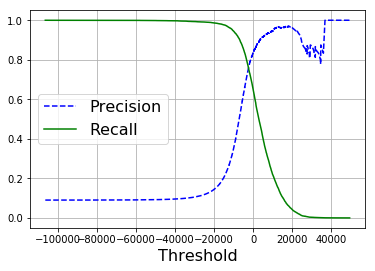

In [38]:
plot_precision_recall_vs_threshold(precision, recall, thresholds) 
plt.show()

In [39]:
def plot_precision_vs_recall(precision,recall):
    plt.plot(recall,precision,'b--',linewidth=2)
    plt.xlabel('Recall',fontsize=16)
    plt.ylabel("Precision",fontsize=16)
    plt.grid(True)

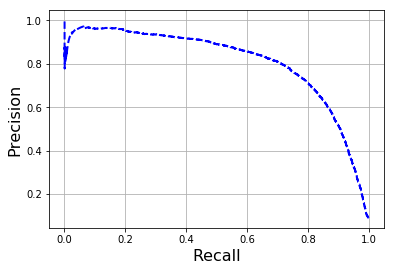

In [40]:
plot_precision_vs_recall(precision,recall)
plt.show()

## Setting Threshold to get Precision of 90% & Recall of 50% approximately

In [41]:
threshold_90_precision = thresholds[np.argmax(precision>=0.90)]

In [42]:
threshold_90_precision

3370.0194991439557

In [43]:
y_train_5_predict_90_precision = (y_score>=threshold_90_precision)

In [44]:
precision_score(y_train_5,y_train_5_predict_90_precision)

0.9000345901072293

In [45]:
recall_score(y_train_5,y_train_5_predict_90_precision)

0.4799852425751706

In [46]:
confusion_matrix(y_train_5,y_train_5_predict_90_precision)

array([[54290,   289],
       [ 2819,  2602]], dtype=int64)

## ROC CURVE

In [47]:
from sklearn.metrics import roc_curve

In [48]:
fpr,tpr,threshold_roc = roc_curve(y_train_5,y_score)

In [49]:
def plot_roc_curve(fpr,tpr,lables=None):
    plt.plot(fpr,tpr,'b--',label=lables,linewidth=2)
    plt.grid(True)
    plt.xlabel('fpr',fontsize=16)
    plt.ylabel('tpr',fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--',label = 'Random Classifier') # dashed diagonal
    plt.legend(loc='lower right')


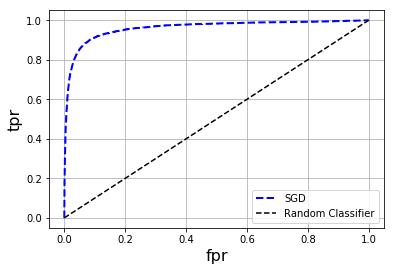

In [50]:
plot_roc_curve(fpr,tpr,'SGD')
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_train_5,y_score)

0.9604938554008616

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rand_clf = RandomForestClassifier(n_estimators=100,random_state=121)

In [55]:
rand_prob = cross_val_predict(rand_clf,X_train,y_train_5,cv=3,
                           method='predict_proba')

In [56]:
rand_score = rand_prob[:,1]

In [57]:
fpr_rand,tpr_rand,threshold_rand = roc_curve(y_train_5,rand_score)

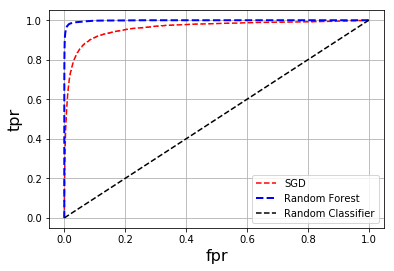

In [58]:
plt.plot(fpr,tpr,'r--',label='SGD')
plot_roc_curve(fpr_rand,tpr_rand,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [59]:
roc_auc_score(y_train_5,rand_score)

0.998332697130796

In [60]:
roc_auc_score(y_train_5,y_score)

0.9604938554008616

## Evaluate Random Forest on Test Data

In [61]:
rand_clf.fit(X_train,y_train_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=121,
                       verbose=0, warm_start=False)

In [62]:
rand_predict_test = rand_clf.predict(X_test)

In [63]:
confusion_matrix(y_test_5,rand_predict_test)

array([[9104,    4],
       [ 118,  774]], dtype=int64)

In [64]:
precision_score(y_test_5,rand_predict_test)

0.9948586118251928

In [65]:
recall_score(y_test_5,rand_predict_test)

0.8677130044843049

As we can see our final model is doing well on unseen/test data and we have 99% precision and 87% recall rate approximately